In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error


In [ ]:
#Reinstates Pandas Plotting Converters to Use for Graphs
pd.plotting.register_matplotlib_converters()

In [15]:
cd Nashville Weather Data

/Users/darektidwell/Documents/Nashville Weather Data


In [16]:
df = pd.read_csv('nashville weaher.csv')


In [17]:
df.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",1987-05-19,NaN,88.0,68.0
1,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",1987-05-20,NaN,89.0,69.0
2,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",1987-05-21,NaN,86.0,70.0
3,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",1987-05-22,NaN,87.0,67.0
4,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",1987-05-23,NaN,86.0,67.0


In [18]:
df = df.drop('STATION', axis=1)
df = df.drop('NAME', axis=1)

In [19]:
df = df.drop('TAVG', axis=1)
df = df.rename(columns={'DATE':'ds', 'TMAX':'y'} )


In [20]:
df['ds']= df['ds'].apply(pd.to_datetime)

In [21]:
df = df.set_index('ds')

In [22]:
train = df['1987':'2016']
test = df['2017':'2019']

In [23]:
test.head()

,y,TMIN
ds,,
2017-01-01,55.0,46.0
2017-01-02,65.0,54.0
2017-01-03,66.0,43.0
2017-01-04,43.0,26.0
2017-01-05,33.0,24.0


In [24]:
train = train.reset_index()
test = test.reset_index()
test.head()

,ds,y,TMIN
0,2017-01-01,55.0,46.0
1,2017-01-02,65.0,54.0
2,2017-01-03,66.0,43.0
3,2017-01-04,43.0,26.0
4,2017-01-05,33.0,24.0


In [26]:
import seaborn as sns

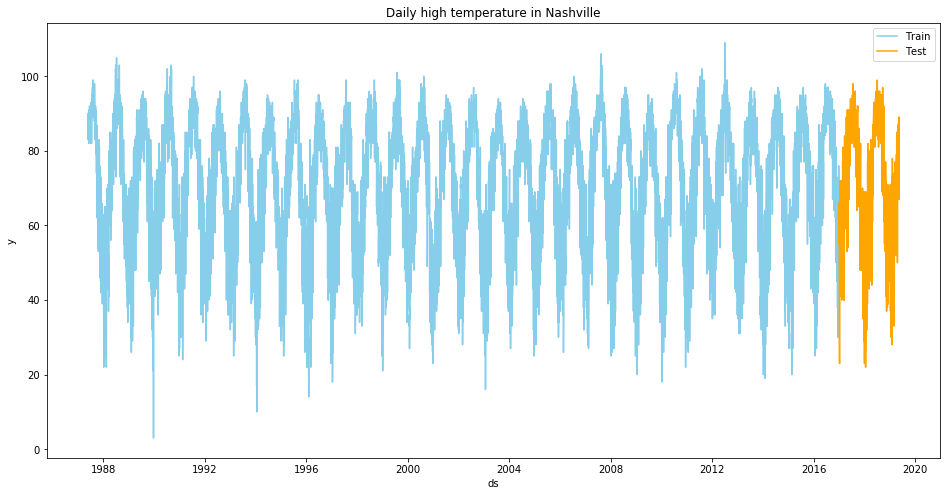

In [32]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='ds', y='y', color='skyblue', data=train, label='Train')
sns.lineplot(x='ds', y='y', color='orange', label='Test', data=test, ax=ax)
plt.title('Daily high temperature in Nashville');

In [33]:
train['mean_baseline'] = train['y'].mean()
test['mean_baseline']  = train['y'].mean()
print('Average daily high temperature in the train set:', train['y'].mean())

Average daily high temperature in the train set: 70.70683918669131


In [34]:
train['naive_baseline'] = train['y'].shift(1).bfill()
train_last_observation = train['naive_baseline'].iloc[-1]
test['naive_baseline'] = train_last_observation

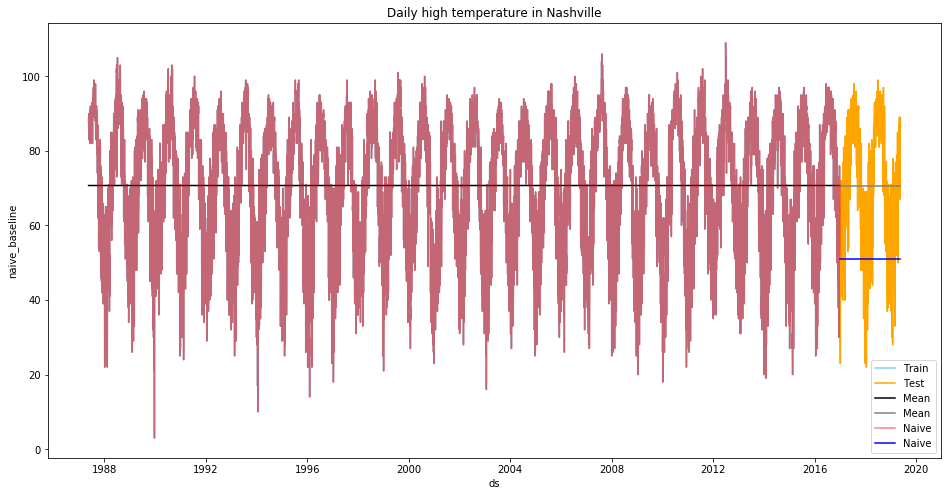

In [38]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='ds', y='y', color='skyblue', data=train, label='Train')
sns.lineplot(x='ds', y='y', color='orange', label='Test', data=test, ax=ax)
sns.lineplot(x='ds', y='mean_baseline', color='black', data=train, label='Mean', ax=ax)
sns.lineplot(x='ds', y='mean_baseline', color='gray', data=test, label='Mean',ax=ax)
sns.lineplot(x='ds', y='naive_baseline', color='red', alpha=.5, data=train, label='Naive', ax=ax)
sns.lineplot(x='ds', y='naive_baseline', color='blue', data=test, label='Naive',ax=ax)

plt.title('Daily high temperature in Nashville');

In [44]:
test = test.fillna(method='ffill')


In [45]:
train_mae = mean_absolute_error(train['y'], train['mean_baseline'])
test_mae = mean_absolute_error(test['y'], test['mean_baseline'])
print('Train MAE, for mean baseline:', train_mae)
print('Test MAE, for mean baseline:', test_mae)

Train MAE, for mean baseline: 14.806847728414212
Test MAE, for mean baseline: 14.717613250831155


In [46]:
train_mae = mean_absolute_error(train['y'], train['naive_baseline'])
test_mae = mean_absolute_error(test['y'], test['naive_baseline'])
print('Train MAE, for naive baseline:', train_mae)
print('Test MAE, for naive baseline:', test_mae)

Train MAE, for naive baseline: 5.631608133086877
Test MAE, for naive baseline: 22.581127733026467


In [47]:
weather_model = Prophet(daily_seasonality=False)
weather_model.fit(train)
train_forecast = weather_model.predict(train)
test_forecast = weather_model.predict(test)

/Users/darektidwell/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [49]:
train_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10815,2016-12-27,72.399118,40.182232,62.898938,72.399118,72.399118,-21.325801,-21.325801,-21.325801,0.339661,0.339661,0.339661,-21.665461,-21.665461,-21.665461,0.0,0.0,0.0,51.073318
10816,2016-12-28,72.399965,38.901163,62.111252,72.399965,72.399965,-21.497190,-21.497190,-21.497190,0.286116,0.286116,0.286116,-21.783306,-21.783306,-21.783306,0.0,0.0,0.0,50.902775
10817,2016-12-29,72.400813,38.610591,61.506292,72.400813,72.400813,-21.997477,-21.997477,-21.997477,-0.097916,-0.097916,-0.097916,-21.899561,-21.899561,-21.899561,0.0,0.0,0.0,50.403336
10818,2016-12-30,72.401660,37.389355,60.816964,72.401660,72.401660,-22.570632,-22.570632,-22.570632,-0.556942,-0.556942,-0.556942,-22.013691,-22.013691,-22.013691,0.0,0.0,0.0,49.831027
10819,2016-12-31,72.402507,38.317422,60.160680,72.402507,72.402507,-22.356321,-22.356321,-22.356321,-0.231338,-0.231338,-0.231338,-22.124983,-22.124983,-22.124983,0.0,0.0,0.0,50.046186


In [51]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,72.403354,38.976531,62.026292,72.403354,72.403354,-22.167216,-22.167216,-22.167216,0.065357,0.065357,0.065357,-22.232573,-22.232573,-22.232573,0.0,0.0,0.0,50.236138
1,2017-01-02,72.404202,39.488337,62.090455,72.404202,72.404202,-22.140418,-22.140418,-22.140418,0.195062,0.195062,0.195062,-22.335480,-22.335480,-22.335480,0.0,0.0,0.0,50.263784
2,2017-01-03,72.405049,38.208046,61.796523,72.405049,72.405049,-22.092976,-22.092976,-22.092976,0.339661,0.339661,0.339661,-22.432637,-22.432637,-22.432637,0.0,0.0,0.0,50.312073
3,2017-01-04,72.405896,38.667985,61.728255,72.405896,72.405896,-22.236813,-22.236813,-22.236813,0.286116,0.286116,0.286116,-22.522929,-22.522929,-22.522929,0.0,0.0,0.0,50.169083
4,2017-01-05,72.406743,37.742112,60.996314,72.406743,72.406743,-22.703150,-22.703150,-22.703150,-0.097916,-0.097916,-0.097916,-22.605233,-22.605233,-22.605233,0.0,0.0,0.0,49.703594


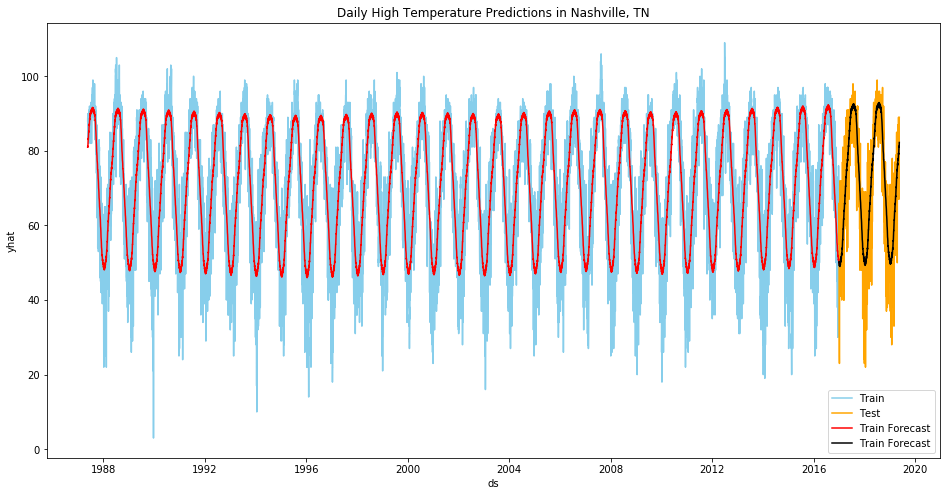

In [53]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='ds', y='y', color='skyblue', data=train, label='Train')
sns.lineplot(x='ds', y='y', color='orange', label='Test', data=test, ax=ax)
sns.lineplot(x='ds', y='yhat', color='red', label='Train Forecast', data=train_forecast, ax=ax)
sns.lineplot(x='ds', y='yhat', color='black', label='Train Forecast', data=test_forecast, ax=ax)

plt.title('Daily High Temperature Predictions in Nashville, TN');

In [54]:
train_mae = mean_absolute_error(train['y'], train_forecast['yhat'])
test_mae = mean_absolute_error(test['y'], test_forecast['yhat'])
print('Train MAE for Prophet (default params):', train_mae)
print('Test MAE for Prophet (default params):', test_mae)

Train MAE for Prophet (default params): 7.079822370723719
Test MAE for Prophet (default params): 7.678912953803708


In [58]:
weather_model2 = Prophet(daily_seasonality=False,
                        changepoint_prior_scale=4)
weather_model2.fit(train)
train_forecast2 = weather_model2.predict(train)
test_forecast2 = weather_model2.predict(test)

/Users/darektidwell/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



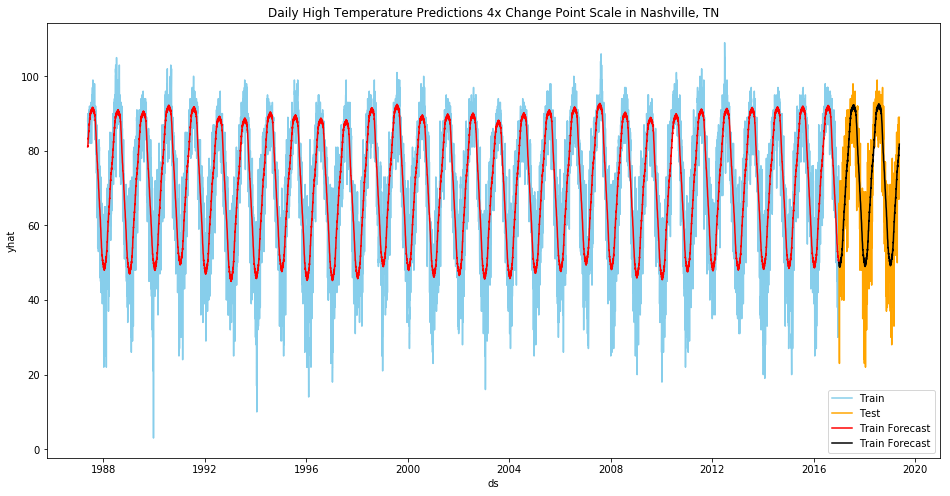

In [62]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='ds', y='y', color='skyblue', data=train, label='Train')
sns.lineplot(x='ds', y='y', color='orange', label='Test', data=test, ax=ax)
sns.lineplot(x='ds', y='yhat', color='red', label='Train Forecast', data=train_forecast2, ax=ax)
sns.lineplot(x='ds', y='yhat', color='black', label='Train Forecast', data=test_forecast2, ax=ax)

plt.title('Daily High Temperature Predictions 4x Change Point Scale in Nashville, TN');

In [64]:
train_mae2 = mean_absolute_error(train['y'], train_forecast2['yhat'])
test_mae2 = mean_absolute_error(test['y'], test_forecast2['yhat'])
print('Train MAE for Prophet (default params):', train_mae2)
print('Test MAE for Prophet (default params):', test_mae2)

Train MAE for Prophet (default params): 7.022387362399383
Test MAE for Prophet (default params): 7.689481397729511


In [72]:
4*365

1460

from fbprophet.diagnostics import cross_validation


In [73]:
df_cv = cross_validation(weather_model2, initial='1460 days', 
                         horizon='730 days', period='180 days')

INFO:fbprophet:Making 48 forecasts with cutoffs between 1991-11-03 00:00:00 and 2015-01-01 00:00:00


In [74]:
df_cv.describe(exclude='number')

,ds,cutoff
count,35040,35040
unique,9190,48
top,2008-08-06 00:00:00,2014-07-05 00:00:00
freq,5,730
first,1991-11-04 00:00:00,1991-11-03 00:00:00
last,2016-12-31 00:00:00,2015-01-01 00:00:00


In [75]:
from fbprophet.diagnostics import performance_metrics
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,coverage
0,73 days,89.546484,9.462900,7.568003,0.125837,0.769406
1,74 days,89.423382,9.456394,7.573914,0.125718,0.768550
2,75 days,88.730125,9.419667,7.544284,0.124770,0.769406
3,76 days,88.665293,9.416225,7.544037,0.124501,0.769406
4,77 days,89.217127,9.445482,7.568710,0.124814,0.768836


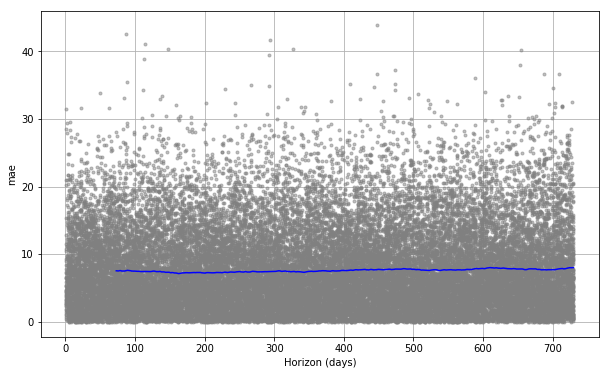

In [76]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')